In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [19]:
# 6w
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()  # [高度,宽度,通道] -> [通道,高度,宽度]  -> 卷积
)
# 1w
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [34]:
print(training_data.data.shape)
print(type(training_data))

torch.Size([60000, 28, 28])
<class 'torchvision.datasets.mnist.FashionMNIST'>


In [35]:
print(training_data.data[0].shape)  # torch.Size([28, 28])
img,label = training_data[0]
print(img)
print(label)

torch.Size([28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.

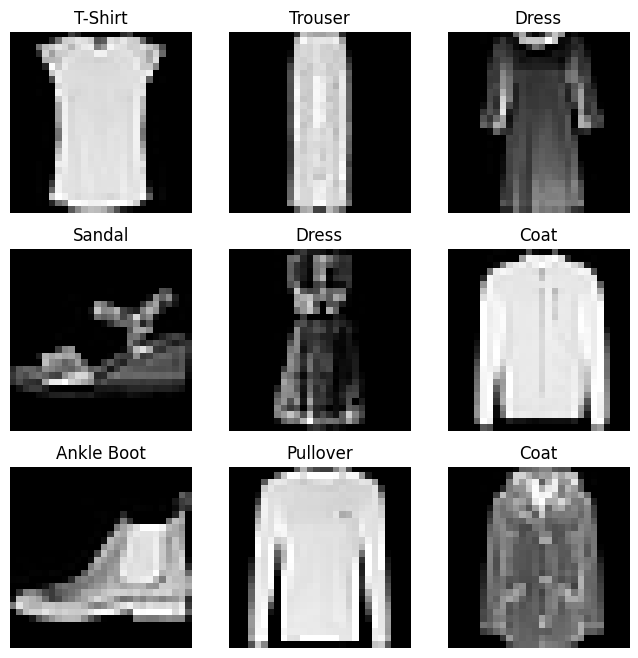

In [26]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # size参数指定生成的张量的形状。size参数的类型是tuple，元组的每个元素对应生成张量的每个维度的大小。
    img, label = training_data[sample_idx]
#     print(img.shape)   # torch.Size([1, 28, 28])
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray") #  plt.imshow(img.reshape(28,28), cmap="gray") # plt.imshow(img.view(28,28), cmap="gray") 
plt.show()

In [36]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


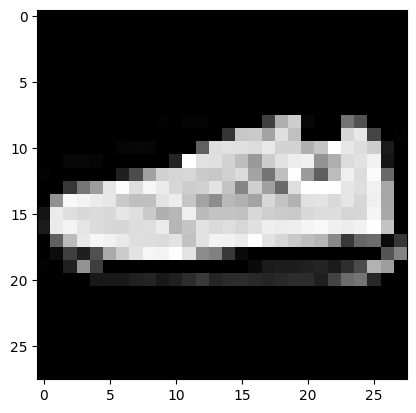

Label: 7


In [46]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [47]:
epochs = 10 # 10轮，每轮60000张
for i in range(epochs):
    # for train_features, train_labels in train_dataloader:等同于for train_features, train_labels in iter(train_dataloader):
    # 更进一步，这实际上等同于
    '''
    train_iterator = iter(train_dataloader)
    try:
        while True:
            train_features, train_labels = next(train_iterator)
    except StopIteration:
        pass
    '''
    for batch_idx,(batch_x,batch_y) in enumerate(train_dataloader):
        # model.train(batch_x,batch_y) -> forward -> pred_y -> loss(pred_y,batch_y) -> backward -> parameters grads -> optimize apply(parameters weights - learning_rate*parameters grads)
        print(f'epoch:[{i}],batch:[{batch_idx}]')

epoch:[0],batch:[0]
epoch:[0],batch:[1]
epoch:[0],batch:[2]
epoch:[0],batch:[3]
epoch:[0],batch:[4]
epoch:[0],batch:[5]
epoch:[0],batch:[6]
epoch:[0],batch:[7]
epoch:[0],batch:[8]
epoch:[0],batch:[9]
epoch:[0],batch:[10]
epoch:[0],batch:[11]
epoch:[0],batch:[12]
epoch:[0],batch:[13]
epoch:[0],batch:[14]
epoch:[0],batch:[15]
epoch:[0],batch:[16]
epoch:[0],batch:[17]
epoch:[0],batch:[18]
epoch:[0],batch:[19]
epoch:[0],batch:[20]
epoch:[0],batch:[21]
epoch:[0],batch:[22]
epoch:[0],batch:[23]
epoch:[0],batch:[24]
epoch:[0],batch:[25]
epoch:[0],batch:[26]
epoch:[0],batch:[27]
epoch:[0],batch:[28]
epoch:[0],batch:[29]
epoch:[0],batch:[30]
epoch:[0],batch:[31]
epoch:[0],batch:[32]
epoch:[0],batch:[33]
epoch:[0],batch:[34]
epoch:[0],batch:[35]
epoch:[0],batch:[36]
epoch:[0],batch:[37]
epoch:[0],batch:[38]
epoch:[0],batch:[39]
epoch:[0],batch:[40]
epoch:[0],batch:[41]
epoch:[0],batch:[42]
epoch:[0],batch:[43]
epoch:[0],batch:[44]
epoch:[0],batch:[45]
epoch:[0],batch:[46]
epoch:[0],batch:[47]
ep

epoch:[0],batch:[407]
epoch:[0],batch:[408]
epoch:[0],batch:[409]
epoch:[0],batch:[410]
epoch:[0],batch:[411]
epoch:[0],batch:[412]
epoch:[0],batch:[413]
epoch:[0],batch:[414]
epoch:[0],batch:[415]
epoch:[0],batch:[416]
epoch:[0],batch:[417]
epoch:[0],batch:[418]
epoch:[0],batch:[419]
epoch:[0],batch:[420]
epoch:[0],batch:[421]
epoch:[0],batch:[422]
epoch:[0],batch:[423]
epoch:[0],batch:[424]
epoch:[0],batch:[425]
epoch:[0],batch:[426]
epoch:[0],batch:[427]
epoch:[0],batch:[428]
epoch:[0],batch:[429]
epoch:[0],batch:[430]
epoch:[0],batch:[431]
epoch:[0],batch:[432]
epoch:[0],batch:[433]
epoch:[0],batch:[434]
epoch:[0],batch:[435]
epoch:[0],batch:[436]
epoch:[0],batch:[437]
epoch:[0],batch:[438]
epoch:[0],batch:[439]
epoch:[0],batch:[440]
epoch:[0],batch:[441]
epoch:[0],batch:[442]
epoch:[0],batch:[443]
epoch:[0],batch:[444]
epoch:[0],batch:[445]
epoch:[0],batch:[446]
epoch:[0],batch:[447]
epoch:[0],batch:[448]
epoch:[0],batch:[449]
epoch:[0],batch:[450]
epoch:[0],batch:[451]
epoch:[0],

epoch:[0],batch:[807]
epoch:[0],batch:[808]
epoch:[0],batch:[809]
epoch:[0],batch:[810]
epoch:[0],batch:[811]
epoch:[0],batch:[812]
epoch:[0],batch:[813]
epoch:[0],batch:[814]
epoch:[0],batch:[815]
epoch:[0],batch:[816]
epoch:[0],batch:[817]
epoch:[0],batch:[818]
epoch:[0],batch:[819]
epoch:[0],batch:[820]
epoch:[0],batch:[821]
epoch:[0],batch:[822]
epoch:[0],batch:[823]
epoch:[0],batch:[824]
epoch:[0],batch:[825]
epoch:[0],batch:[826]
epoch:[0],batch:[827]
epoch:[0],batch:[828]
epoch:[0],batch:[829]
epoch:[0],batch:[830]
epoch:[0],batch:[831]
epoch:[0],batch:[832]
epoch:[0],batch:[833]
epoch:[0],batch:[834]
epoch:[0],batch:[835]
epoch:[0],batch:[836]
epoch:[0],batch:[837]
epoch:[0],batch:[838]
epoch:[0],batch:[839]
epoch:[0],batch:[840]
epoch:[0],batch:[841]
epoch:[0],batch:[842]
epoch:[0],batch:[843]
epoch:[0],batch:[844]
epoch:[0],batch:[845]
epoch:[0],batch:[846]
epoch:[0],batch:[847]
epoch:[0],batch:[848]
epoch:[0],batch:[849]
epoch:[0],batch:[850]
epoch:[0],batch:[851]
epoch:[0],

epoch:[1],batch:[289]
epoch:[1],batch:[290]
epoch:[1],batch:[291]
epoch:[1],batch:[292]
epoch:[1],batch:[293]
epoch:[1],batch:[294]
epoch:[1],batch:[295]
epoch:[1],batch:[296]
epoch:[1],batch:[297]
epoch:[1],batch:[298]
epoch:[1],batch:[299]
epoch:[1],batch:[300]
epoch:[1],batch:[301]
epoch:[1],batch:[302]
epoch:[1],batch:[303]
epoch:[1],batch:[304]
epoch:[1],batch:[305]
epoch:[1],batch:[306]
epoch:[1],batch:[307]
epoch:[1],batch:[308]
epoch:[1],batch:[309]
epoch:[1],batch:[310]
epoch:[1],batch:[311]
epoch:[1],batch:[312]
epoch:[1],batch:[313]
epoch:[1],batch:[314]
epoch:[1],batch:[315]
epoch:[1],batch:[316]
epoch:[1],batch:[317]
epoch:[1],batch:[318]
epoch:[1],batch:[319]
epoch:[1],batch:[320]
epoch:[1],batch:[321]
epoch:[1],batch:[322]
epoch:[1],batch:[323]
epoch:[1],batch:[324]
epoch:[1],batch:[325]
epoch:[1],batch:[326]
epoch:[1],batch:[327]
epoch:[1],batch:[328]
epoch:[1],batch:[329]
epoch:[1],batch:[330]
epoch:[1],batch:[331]
epoch:[1],batch:[332]
epoch:[1],batch:[333]
epoch:[1],

epoch:[1],batch:[690]
epoch:[1],batch:[691]
epoch:[1],batch:[692]
epoch:[1],batch:[693]
epoch:[1],batch:[694]
epoch:[1],batch:[695]
epoch:[1],batch:[696]
epoch:[1],batch:[697]
epoch:[1],batch:[698]
epoch:[1],batch:[699]
epoch:[1],batch:[700]
epoch:[1],batch:[701]
epoch:[1],batch:[702]
epoch:[1],batch:[703]
epoch:[1],batch:[704]
epoch:[1],batch:[705]
epoch:[1],batch:[706]
epoch:[1],batch:[707]
epoch:[1],batch:[708]
epoch:[1],batch:[709]
epoch:[1],batch:[710]
epoch:[1],batch:[711]
epoch:[1],batch:[712]
epoch:[1],batch:[713]
epoch:[1],batch:[714]
epoch:[1],batch:[715]
epoch:[1],batch:[716]
epoch:[1],batch:[717]
epoch:[1],batch:[718]
epoch:[1],batch:[719]
epoch:[1],batch:[720]
epoch:[1],batch:[721]
epoch:[1],batch:[722]
epoch:[1],batch:[723]
epoch:[1],batch:[724]
epoch:[1],batch:[725]
epoch:[1],batch:[726]
epoch:[1],batch:[727]
epoch:[1],batch:[728]
epoch:[1],batch:[729]
epoch:[1],batch:[730]
epoch:[1],batch:[731]
epoch:[1],batch:[732]
epoch:[1],batch:[733]
epoch:[1],batch:[734]
epoch:[1],

epoch:[2],batch:[179]
epoch:[2],batch:[180]
epoch:[2],batch:[181]
epoch:[2],batch:[182]
epoch:[2],batch:[183]
epoch:[2],batch:[184]
epoch:[2],batch:[185]
epoch:[2],batch:[186]
epoch:[2],batch:[187]
epoch:[2],batch:[188]
epoch:[2],batch:[189]
epoch:[2],batch:[190]
epoch:[2],batch:[191]
epoch:[2],batch:[192]
epoch:[2],batch:[193]
epoch:[2],batch:[194]
epoch:[2],batch:[195]
epoch:[2],batch:[196]
epoch:[2],batch:[197]
epoch:[2],batch:[198]
epoch:[2],batch:[199]
epoch:[2],batch:[200]
epoch:[2],batch:[201]
epoch:[2],batch:[202]
epoch:[2],batch:[203]
epoch:[2],batch:[204]
epoch:[2],batch:[205]
epoch:[2],batch:[206]
epoch:[2],batch:[207]
epoch:[2],batch:[208]
epoch:[2],batch:[209]
epoch:[2],batch:[210]
epoch:[2],batch:[211]
epoch:[2],batch:[212]
epoch:[2],batch:[213]
epoch:[2],batch:[214]
epoch:[2],batch:[215]
epoch:[2],batch:[216]
epoch:[2],batch:[217]
epoch:[2],batch:[218]
epoch:[2],batch:[219]
epoch:[2],batch:[220]
epoch:[2],batch:[221]
epoch:[2],batch:[222]
epoch:[2],batch:[223]
epoch:[2],

epoch:[2],batch:[582]
epoch:[2],batch:[583]
epoch:[2],batch:[584]
epoch:[2],batch:[585]
epoch:[2],batch:[586]
epoch:[2],batch:[587]
epoch:[2],batch:[588]
epoch:[2],batch:[589]
epoch:[2],batch:[590]
epoch:[2],batch:[591]
epoch:[2],batch:[592]
epoch:[2],batch:[593]
epoch:[2],batch:[594]
epoch:[2],batch:[595]
epoch:[2],batch:[596]
epoch:[2],batch:[597]
epoch:[2],batch:[598]
epoch:[2],batch:[599]
epoch:[2],batch:[600]
epoch:[2],batch:[601]
epoch:[2],batch:[602]
epoch:[2],batch:[603]
epoch:[2],batch:[604]
epoch:[2],batch:[605]
epoch:[2],batch:[606]
epoch:[2],batch:[607]
epoch:[2],batch:[608]
epoch:[2],batch:[609]
epoch:[2],batch:[610]
epoch:[2],batch:[611]
epoch:[2],batch:[612]
epoch:[2],batch:[613]
epoch:[2],batch:[614]
epoch:[2],batch:[615]
epoch:[2],batch:[616]
epoch:[2],batch:[617]
epoch:[2],batch:[618]
epoch:[2],batch:[619]
epoch:[2],batch:[620]
epoch:[2],batch:[621]
epoch:[2],batch:[622]
epoch:[2],batch:[623]
epoch:[2],batch:[624]
epoch:[2],batch:[625]
epoch:[2],batch:[626]
epoch:[2],

epoch:[3],batch:[61]
epoch:[3],batch:[62]
epoch:[3],batch:[63]
epoch:[3],batch:[64]
epoch:[3],batch:[65]
epoch:[3],batch:[66]
epoch:[3],batch:[67]
epoch:[3],batch:[68]
epoch:[3],batch:[69]
epoch:[3],batch:[70]
epoch:[3],batch:[71]
epoch:[3],batch:[72]
epoch:[3],batch:[73]
epoch:[3],batch:[74]
epoch:[3],batch:[75]
epoch:[3],batch:[76]
epoch:[3],batch:[77]
epoch:[3],batch:[78]
epoch:[3],batch:[79]
epoch:[3],batch:[80]
epoch:[3],batch:[81]
epoch:[3],batch:[82]
epoch:[3],batch:[83]
epoch:[3],batch:[84]
epoch:[3],batch:[85]
epoch:[3],batch:[86]
epoch:[3],batch:[87]
epoch:[3],batch:[88]
epoch:[3],batch:[89]
epoch:[3],batch:[90]
epoch:[3],batch:[91]
epoch:[3],batch:[92]
epoch:[3],batch:[93]
epoch:[3],batch:[94]
epoch:[3],batch:[95]
epoch:[3],batch:[96]
epoch:[3],batch:[97]
epoch:[3],batch:[98]
epoch:[3],batch:[99]
epoch:[3],batch:[100]
epoch:[3],batch:[101]
epoch:[3],batch:[102]
epoch:[3],batch:[103]
epoch:[3],batch:[104]
epoch:[3],batch:[105]
epoch:[3],batch:[106]
epoch:[3],batch:[107]
epoch

epoch:[3],batch:[468]
epoch:[3],batch:[469]
epoch:[3],batch:[470]
epoch:[3],batch:[471]
epoch:[3],batch:[472]
epoch:[3],batch:[473]
epoch:[3],batch:[474]
epoch:[3],batch:[475]
epoch:[3],batch:[476]
epoch:[3],batch:[477]
epoch:[3],batch:[478]
epoch:[3],batch:[479]
epoch:[3],batch:[480]
epoch:[3],batch:[481]
epoch:[3],batch:[482]
epoch:[3],batch:[483]
epoch:[3],batch:[484]
epoch:[3],batch:[485]
epoch:[3],batch:[486]
epoch:[3],batch:[487]
epoch:[3],batch:[488]
epoch:[3],batch:[489]
epoch:[3],batch:[490]
epoch:[3],batch:[491]
epoch:[3],batch:[492]
epoch:[3],batch:[493]
epoch:[3],batch:[494]
epoch:[3],batch:[495]
epoch:[3],batch:[496]
epoch:[3],batch:[497]
epoch:[3],batch:[498]
epoch:[3],batch:[499]
epoch:[3],batch:[500]
epoch:[3],batch:[501]
epoch:[3],batch:[502]
epoch:[3],batch:[503]
epoch:[3],batch:[504]
epoch:[3],batch:[505]
epoch:[3],batch:[506]
epoch:[3],batch:[507]
epoch:[3],batch:[508]
epoch:[3],batch:[509]
epoch:[3],batch:[510]
epoch:[3],batch:[511]
epoch:[3],batch:[512]
epoch:[3],

epoch:[3],batch:[879]
epoch:[3],batch:[880]
epoch:[3],batch:[881]
epoch:[3],batch:[882]
epoch:[3],batch:[883]
epoch:[3],batch:[884]
epoch:[3],batch:[885]
epoch:[3],batch:[886]
epoch:[3],batch:[887]
epoch:[3],batch:[888]
epoch:[3],batch:[889]
epoch:[3],batch:[890]
epoch:[3],batch:[891]
epoch:[3],batch:[892]
epoch:[3],batch:[893]
epoch:[3],batch:[894]
epoch:[3],batch:[895]
epoch:[3],batch:[896]
epoch:[3],batch:[897]
epoch:[3],batch:[898]
epoch:[3],batch:[899]
epoch:[3],batch:[900]
epoch:[3],batch:[901]
epoch:[3],batch:[902]
epoch:[3],batch:[903]
epoch:[3],batch:[904]
epoch:[3],batch:[905]
epoch:[3],batch:[906]
epoch:[3],batch:[907]
epoch:[3],batch:[908]
epoch:[3],batch:[909]
epoch:[3],batch:[910]
epoch:[3],batch:[911]
epoch:[3],batch:[912]
epoch:[3],batch:[913]
epoch:[3],batch:[914]
epoch:[3],batch:[915]
epoch:[3],batch:[916]
epoch:[3],batch:[917]
epoch:[3],batch:[918]
epoch:[3],batch:[919]
epoch:[3],batch:[920]
epoch:[3],batch:[921]
epoch:[3],batch:[922]
epoch:[3],batch:[923]
epoch:[3],

epoch:[4],batch:[345]
epoch:[4],batch:[346]
epoch:[4],batch:[347]
epoch:[4],batch:[348]
epoch:[4],batch:[349]
epoch:[4],batch:[350]
epoch:[4],batch:[351]
epoch:[4],batch:[352]
epoch:[4],batch:[353]
epoch:[4],batch:[354]
epoch:[4],batch:[355]
epoch:[4],batch:[356]
epoch:[4],batch:[357]
epoch:[4],batch:[358]
epoch:[4],batch:[359]
epoch:[4],batch:[360]
epoch:[4],batch:[361]
epoch:[4],batch:[362]
epoch:[4],batch:[363]
epoch:[4],batch:[364]
epoch:[4],batch:[365]
epoch:[4],batch:[366]
epoch:[4],batch:[367]
epoch:[4],batch:[368]
epoch:[4],batch:[369]
epoch:[4],batch:[370]
epoch:[4],batch:[371]
epoch:[4],batch:[372]
epoch:[4],batch:[373]
epoch:[4],batch:[374]
epoch:[4],batch:[375]
epoch:[4],batch:[376]
epoch:[4],batch:[377]
epoch:[4],batch:[378]
epoch:[4],batch:[379]
epoch:[4],batch:[380]
epoch:[4],batch:[381]
epoch:[4],batch:[382]
epoch:[4],batch:[383]
epoch:[4],batch:[384]
epoch:[4],batch:[385]
epoch:[4],batch:[386]
epoch:[4],batch:[387]
epoch:[4],batch:[388]
epoch:[4],batch:[389]
epoch:[4],

epoch:[4],batch:[747]
epoch:[4],batch:[748]
epoch:[4],batch:[749]
epoch:[4],batch:[750]
epoch:[4],batch:[751]
epoch:[4],batch:[752]
epoch:[4],batch:[753]
epoch:[4],batch:[754]
epoch:[4],batch:[755]
epoch:[4],batch:[756]
epoch:[4],batch:[757]
epoch:[4],batch:[758]
epoch:[4],batch:[759]
epoch:[4],batch:[760]
epoch:[4],batch:[761]
epoch:[4],batch:[762]
epoch:[4],batch:[763]
epoch:[4],batch:[764]
epoch:[4],batch:[765]
epoch:[4],batch:[766]
epoch:[4],batch:[767]
epoch:[4],batch:[768]
epoch:[4],batch:[769]
epoch:[4],batch:[770]
epoch:[4],batch:[771]
epoch:[4],batch:[772]
epoch:[4],batch:[773]
epoch:[4],batch:[774]
epoch:[4],batch:[775]
epoch:[4],batch:[776]
epoch:[4],batch:[777]
epoch:[4],batch:[778]
epoch:[4],batch:[779]
epoch:[4],batch:[780]
epoch:[4],batch:[781]
epoch:[4],batch:[782]
epoch:[4],batch:[783]
epoch:[4],batch:[784]
epoch:[4],batch:[785]
epoch:[4],batch:[786]
epoch:[4],batch:[787]
epoch:[4],batch:[788]
epoch:[4],batch:[789]
epoch:[4],batch:[790]
epoch:[4],batch:[791]
epoch:[4],

epoch:[5],batch:[228]
epoch:[5],batch:[229]
epoch:[5],batch:[230]
epoch:[5],batch:[231]
epoch:[5],batch:[232]
epoch:[5],batch:[233]
epoch:[5],batch:[234]
epoch:[5],batch:[235]
epoch:[5],batch:[236]
epoch:[5],batch:[237]
epoch:[5],batch:[238]
epoch:[5],batch:[239]
epoch:[5],batch:[240]
epoch:[5],batch:[241]
epoch:[5],batch:[242]
epoch:[5],batch:[243]
epoch:[5],batch:[244]
epoch:[5],batch:[245]
epoch:[5],batch:[246]
epoch:[5],batch:[247]
epoch:[5],batch:[248]
epoch:[5],batch:[249]
epoch:[5],batch:[250]
epoch:[5],batch:[251]
epoch:[5],batch:[252]
epoch:[5],batch:[253]
epoch:[5],batch:[254]
epoch:[5],batch:[255]
epoch:[5],batch:[256]
epoch:[5],batch:[257]
epoch:[5],batch:[258]
epoch:[5],batch:[259]
epoch:[5],batch:[260]
epoch:[5],batch:[261]
epoch:[5],batch:[262]
epoch:[5],batch:[263]
epoch:[5],batch:[264]
epoch:[5],batch:[265]
epoch:[5],batch:[266]
epoch:[5],batch:[267]
epoch:[5],batch:[268]
epoch:[5],batch:[269]
epoch:[5],batch:[270]
epoch:[5],batch:[271]
epoch:[5],batch:[272]
epoch:[5],

epoch:[5],batch:[632]
epoch:[5],batch:[633]
epoch:[5],batch:[634]
epoch:[5],batch:[635]
epoch:[5],batch:[636]
epoch:[5],batch:[637]
epoch:[5],batch:[638]
epoch:[5],batch:[639]
epoch:[5],batch:[640]
epoch:[5],batch:[641]
epoch:[5],batch:[642]
epoch:[5],batch:[643]
epoch:[5],batch:[644]
epoch:[5],batch:[645]
epoch:[5],batch:[646]
epoch:[5],batch:[647]
epoch:[5],batch:[648]
epoch:[5],batch:[649]
epoch:[5],batch:[650]
epoch:[5],batch:[651]
epoch:[5],batch:[652]
epoch:[5],batch:[653]
epoch:[5],batch:[654]
epoch:[5],batch:[655]
epoch:[5],batch:[656]
epoch:[5],batch:[657]
epoch:[5],batch:[658]
epoch:[5],batch:[659]
epoch:[5],batch:[660]
epoch:[5],batch:[661]
epoch:[5],batch:[662]
epoch:[5],batch:[663]
epoch:[5],batch:[664]
epoch:[5],batch:[665]
epoch:[5],batch:[666]
epoch:[5],batch:[667]
epoch:[5],batch:[668]
epoch:[5],batch:[669]
epoch:[5],batch:[670]
epoch:[5],batch:[671]
epoch:[5],batch:[672]
epoch:[5],batch:[673]
epoch:[5],batch:[674]
epoch:[5],batch:[675]
epoch:[5],batch:[676]
epoch:[5],

epoch:[6],batch:[113]
epoch:[6],batch:[114]
epoch:[6],batch:[115]
epoch:[6],batch:[116]
epoch:[6],batch:[117]
epoch:[6],batch:[118]
epoch:[6],batch:[119]
epoch:[6],batch:[120]
epoch:[6],batch:[121]
epoch:[6],batch:[122]
epoch:[6],batch:[123]
epoch:[6],batch:[124]
epoch:[6],batch:[125]
epoch:[6],batch:[126]
epoch:[6],batch:[127]
epoch:[6],batch:[128]
epoch:[6],batch:[129]
epoch:[6],batch:[130]
epoch:[6],batch:[131]
epoch:[6],batch:[132]
epoch:[6],batch:[133]
epoch:[6],batch:[134]
epoch:[6],batch:[135]
epoch:[6],batch:[136]
epoch:[6],batch:[137]
epoch:[6],batch:[138]
epoch:[6],batch:[139]
epoch:[6],batch:[140]
epoch:[6],batch:[141]
epoch:[6],batch:[142]
epoch:[6],batch:[143]
epoch:[6],batch:[144]
epoch:[6],batch:[145]
epoch:[6],batch:[146]
epoch:[6],batch:[147]
epoch:[6],batch:[148]
epoch:[6],batch:[149]
epoch:[6],batch:[150]
epoch:[6],batch:[151]
epoch:[6],batch:[152]
epoch:[6],batch:[153]
epoch:[6],batch:[154]
epoch:[6],batch:[155]
epoch:[6],batch:[156]
epoch:[6],batch:[157]
epoch:[6],

epoch:[6],batch:[517]
epoch:[6],batch:[518]
epoch:[6],batch:[519]
epoch:[6],batch:[520]
epoch:[6],batch:[521]
epoch:[6],batch:[522]
epoch:[6],batch:[523]
epoch:[6],batch:[524]
epoch:[6],batch:[525]
epoch:[6],batch:[526]
epoch:[6],batch:[527]
epoch:[6],batch:[528]
epoch:[6],batch:[529]
epoch:[6],batch:[530]
epoch:[6],batch:[531]
epoch:[6],batch:[532]
epoch:[6],batch:[533]
epoch:[6],batch:[534]
epoch:[6],batch:[535]
epoch:[6],batch:[536]
epoch:[6],batch:[537]
epoch:[6],batch:[538]
epoch:[6],batch:[539]
epoch:[6],batch:[540]
epoch:[6],batch:[541]
epoch:[6],batch:[542]
epoch:[6],batch:[543]
epoch:[6],batch:[544]
epoch:[6],batch:[545]
epoch:[6],batch:[546]
epoch:[6],batch:[547]
epoch:[6],batch:[548]
epoch:[6],batch:[549]
epoch:[6],batch:[550]
epoch:[6],batch:[551]
epoch:[6],batch:[552]
epoch:[6],batch:[553]
epoch:[6],batch:[554]
epoch:[6],batch:[555]
epoch:[6],batch:[556]
epoch:[6],batch:[557]
epoch:[6],batch:[558]
epoch:[6],batch:[559]
epoch:[6],batch:[560]
epoch:[6],batch:[561]
epoch:[6],

epoch:[6],batch:[928]
epoch:[6],batch:[929]
epoch:[6],batch:[930]
epoch:[6],batch:[931]
epoch:[6],batch:[932]
epoch:[6],batch:[933]
epoch:[6],batch:[934]
epoch:[6],batch:[935]
epoch:[6],batch:[936]
epoch:[6],batch:[937]
epoch:[7],batch:[0]
epoch:[7],batch:[1]
epoch:[7],batch:[2]
epoch:[7],batch:[3]
epoch:[7],batch:[4]
epoch:[7],batch:[5]
epoch:[7],batch:[6]
epoch:[7],batch:[7]
epoch:[7],batch:[8]
epoch:[7],batch:[9]
epoch:[7],batch:[10]
epoch:[7],batch:[11]
epoch:[7],batch:[12]
epoch:[7],batch:[13]
epoch:[7],batch:[14]
epoch:[7],batch:[15]
epoch:[7],batch:[16]
epoch:[7],batch:[17]
epoch:[7],batch:[18]
epoch:[7],batch:[19]
epoch:[7],batch:[20]
epoch:[7],batch:[21]
epoch:[7],batch:[22]
epoch:[7],batch:[23]
epoch:[7],batch:[24]
epoch:[7],batch:[25]
epoch:[7],batch:[26]
epoch:[7],batch:[27]
epoch:[7],batch:[28]
epoch:[7],batch:[29]
epoch:[7],batch:[30]
epoch:[7],batch:[31]
epoch:[7],batch:[32]
epoch:[7],batch:[33]
epoch:[7],batch:[34]
epoch:[7],batch:[35]
epoch:[7],batch:[36]
epoch:[7],bat

epoch:[7],batch:[407]
epoch:[7],batch:[408]
epoch:[7],batch:[409]
epoch:[7],batch:[410]
epoch:[7],batch:[411]
epoch:[7],batch:[412]
epoch:[7],batch:[413]
epoch:[7],batch:[414]
epoch:[7],batch:[415]
epoch:[7],batch:[416]
epoch:[7],batch:[417]
epoch:[7],batch:[418]
epoch:[7],batch:[419]
epoch:[7],batch:[420]
epoch:[7],batch:[421]
epoch:[7],batch:[422]
epoch:[7],batch:[423]
epoch:[7],batch:[424]
epoch:[7],batch:[425]
epoch:[7],batch:[426]
epoch:[7],batch:[427]
epoch:[7],batch:[428]
epoch:[7],batch:[429]
epoch:[7],batch:[430]
epoch:[7],batch:[431]
epoch:[7],batch:[432]
epoch:[7],batch:[433]
epoch:[7],batch:[434]
epoch:[7],batch:[435]
epoch:[7],batch:[436]
epoch:[7],batch:[437]
epoch:[7],batch:[438]
epoch:[7],batch:[439]
epoch:[7],batch:[440]
epoch:[7],batch:[441]
epoch:[7],batch:[442]
epoch:[7],batch:[443]
epoch:[7],batch:[444]
epoch:[7],batch:[445]
epoch:[7],batch:[446]
epoch:[7],batch:[447]
epoch:[7],batch:[448]
epoch:[7],batch:[449]
epoch:[7],batch:[450]
epoch:[7],batch:[451]
epoch:[7],

epoch:[7],batch:[813]
epoch:[7],batch:[814]
epoch:[7],batch:[815]
epoch:[7],batch:[816]
epoch:[7],batch:[817]
epoch:[7],batch:[818]
epoch:[7],batch:[819]
epoch:[7],batch:[820]
epoch:[7],batch:[821]
epoch:[7],batch:[822]
epoch:[7],batch:[823]
epoch:[7],batch:[824]
epoch:[7],batch:[825]
epoch:[7],batch:[826]
epoch:[7],batch:[827]
epoch:[7],batch:[828]
epoch:[7],batch:[829]
epoch:[7],batch:[830]
epoch:[7],batch:[831]
epoch:[7],batch:[832]
epoch:[7],batch:[833]
epoch:[7],batch:[834]
epoch:[7],batch:[835]
epoch:[7],batch:[836]
epoch:[7],batch:[837]
epoch:[7],batch:[838]
epoch:[7],batch:[839]
epoch:[7],batch:[840]
epoch:[7],batch:[841]
epoch:[7],batch:[842]
epoch:[7],batch:[843]
epoch:[7],batch:[844]
epoch:[7],batch:[845]
epoch:[7],batch:[846]
epoch:[7],batch:[847]
epoch:[7],batch:[848]
epoch:[7],batch:[849]
epoch:[7],batch:[850]
epoch:[7],batch:[851]
epoch:[7],batch:[852]
epoch:[7],batch:[853]
epoch:[7],batch:[854]
epoch:[7],batch:[855]
epoch:[7],batch:[856]
epoch:[7],batch:[857]
epoch:[7],

epoch:[8],batch:[291]
epoch:[8],batch:[292]
epoch:[8],batch:[293]
epoch:[8],batch:[294]
epoch:[8],batch:[295]
epoch:[8],batch:[296]
epoch:[8],batch:[297]
epoch:[8],batch:[298]
epoch:[8],batch:[299]
epoch:[8],batch:[300]
epoch:[8],batch:[301]
epoch:[8],batch:[302]
epoch:[8],batch:[303]
epoch:[8],batch:[304]
epoch:[8],batch:[305]
epoch:[8],batch:[306]
epoch:[8],batch:[307]
epoch:[8],batch:[308]
epoch:[8],batch:[309]
epoch:[8],batch:[310]
epoch:[8],batch:[311]
epoch:[8],batch:[312]
epoch:[8],batch:[313]
epoch:[8],batch:[314]
epoch:[8],batch:[315]
epoch:[8],batch:[316]
epoch:[8],batch:[317]
epoch:[8],batch:[318]
epoch:[8],batch:[319]
epoch:[8],batch:[320]
epoch:[8],batch:[321]
epoch:[8],batch:[322]
epoch:[8],batch:[323]
epoch:[8],batch:[324]
epoch:[8],batch:[325]
epoch:[8],batch:[326]
epoch:[8],batch:[327]
epoch:[8],batch:[328]
epoch:[8],batch:[329]
epoch:[8],batch:[330]
epoch:[8],batch:[331]
epoch:[8],batch:[332]
epoch:[8],batch:[333]
epoch:[8],batch:[334]
epoch:[8],batch:[335]
epoch:[8],

epoch:[8],batch:[701]
epoch:[8],batch:[702]
epoch:[8],batch:[703]
epoch:[8],batch:[704]
epoch:[8],batch:[705]
epoch:[8],batch:[706]
epoch:[8],batch:[707]
epoch:[8],batch:[708]
epoch:[8],batch:[709]
epoch:[8],batch:[710]
epoch:[8],batch:[711]
epoch:[8],batch:[712]
epoch:[8],batch:[713]
epoch:[8],batch:[714]
epoch:[8],batch:[715]
epoch:[8],batch:[716]
epoch:[8],batch:[717]
epoch:[8],batch:[718]
epoch:[8],batch:[719]
epoch:[8],batch:[720]
epoch:[8],batch:[721]
epoch:[8],batch:[722]
epoch:[8],batch:[723]
epoch:[8],batch:[724]
epoch:[8],batch:[725]
epoch:[8],batch:[726]
epoch:[8],batch:[727]
epoch:[8],batch:[728]
epoch:[8],batch:[729]
epoch:[8],batch:[730]
epoch:[8],batch:[731]
epoch:[8],batch:[732]
epoch:[8],batch:[733]
epoch:[8],batch:[734]
epoch:[8],batch:[735]
epoch:[8],batch:[736]
epoch:[8],batch:[737]
epoch:[8],batch:[738]
epoch:[8],batch:[739]
epoch:[8],batch:[740]
epoch:[8],batch:[741]
epoch:[8],batch:[742]
epoch:[8],batch:[743]
epoch:[8],batch:[744]
epoch:[8],batch:[745]
epoch:[8],

epoch:[9],batch:[169]
epoch:[9],batch:[170]
epoch:[9],batch:[171]
epoch:[9],batch:[172]
epoch:[9],batch:[173]
epoch:[9],batch:[174]
epoch:[9],batch:[175]
epoch:[9],batch:[176]
epoch:[9],batch:[177]
epoch:[9],batch:[178]
epoch:[9],batch:[179]
epoch:[9],batch:[180]
epoch:[9],batch:[181]
epoch:[9],batch:[182]
epoch:[9],batch:[183]
epoch:[9],batch:[184]
epoch:[9],batch:[185]
epoch:[9],batch:[186]
epoch:[9],batch:[187]
epoch:[9],batch:[188]
epoch:[9],batch:[189]
epoch:[9],batch:[190]
epoch:[9],batch:[191]
epoch:[9],batch:[192]
epoch:[9],batch:[193]
epoch:[9],batch:[194]
epoch:[9],batch:[195]
epoch:[9],batch:[196]
epoch:[9],batch:[197]
epoch:[9],batch:[198]
epoch:[9],batch:[199]
epoch:[9],batch:[200]
epoch:[9],batch:[201]
epoch:[9],batch:[202]
epoch:[9],batch:[203]
epoch:[9],batch:[204]
epoch:[9],batch:[205]
epoch:[9],batch:[206]
epoch:[9],batch:[207]
epoch:[9],batch:[208]
epoch:[9],batch:[209]
epoch:[9],batch:[210]
epoch:[9],batch:[211]
epoch:[9],batch:[212]
epoch:[9],batch:[213]
epoch:[9],

epoch:[9],batch:[571]
epoch:[9],batch:[572]
epoch:[9],batch:[573]
epoch:[9],batch:[574]
epoch:[9],batch:[575]
epoch:[9],batch:[576]
epoch:[9],batch:[577]
epoch:[9],batch:[578]
epoch:[9],batch:[579]
epoch:[9],batch:[580]
epoch:[9],batch:[581]
epoch:[9],batch:[582]
epoch:[9],batch:[583]
epoch:[9],batch:[584]
epoch:[9],batch:[585]
epoch:[9],batch:[586]
epoch:[9],batch:[587]
epoch:[9],batch:[588]
epoch:[9],batch:[589]
epoch:[9],batch:[590]
epoch:[9],batch:[591]
epoch:[9],batch:[592]
epoch:[9],batch:[593]
epoch:[9],batch:[594]
epoch:[9],batch:[595]
epoch:[9],batch:[596]
epoch:[9],batch:[597]
epoch:[9],batch:[598]
epoch:[9],batch:[599]
epoch:[9],batch:[600]
epoch:[9],batch:[601]
epoch:[9],batch:[602]
epoch:[9],batch:[603]
epoch:[9],batch:[604]
epoch:[9],batch:[605]
epoch:[9],batch:[606]
epoch:[9],batch:[607]
epoch:[9],batch:[608]
epoch:[9],batch:[609]
epoch:[9],batch:[610]
epoch:[9],batch:[611]
epoch:[9],batch:[612]
epoch:[9],batch:[613]
epoch:[9],batch:[614]
epoch:[9],batch:[615]
epoch:[9],